In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
data_train_path = '/content/drive/MyDrive/Fruits_Vegetables/train'
data_test_path = '/content/drive/MyDrive/Fruits_Vegetables/test'
data_val_path = '/content/drive/MyDrive/Fruits_Vegetables/validation'

In [ ]:
img_width = 180
img_height = 180

In [ ]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [ ]:
data_cat = data_train.class_names

In [ ]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [ ]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_height,img_width),
    batch_size=32,
    shuffle=False,
    validation_split=False)

Found 351 files belonging to 36 classes.


In [ ]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


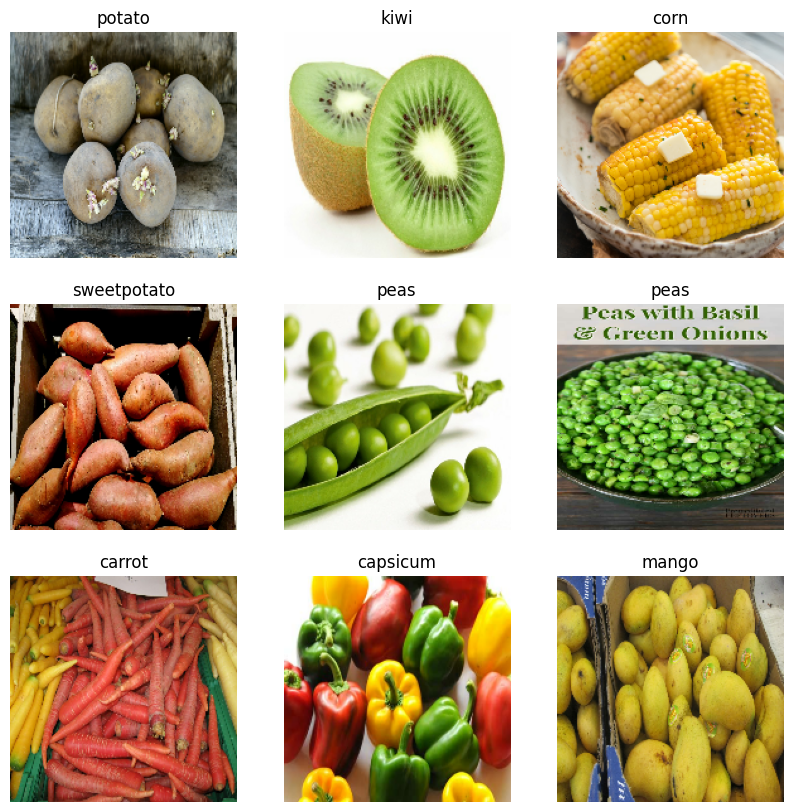

In [ ]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))

])

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train model with EarlyStopping
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 593s 6s/step - accuracy: 0.0576 - loss: 4.0720 - val_accuracy: 0.2393 - val_loss: 2.7625
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.2453 - loss: 2.6990 - val_accuracy: 0.5043 - val_loss: 1.7788
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.4111 - loss: 2.1154 - val_accuracy: 0.6610 - val_loss: 1.2509
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.5234 - loss: 1.6482 - val_accuracy: 0.7464 - val_loss: 0.9589
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.6693 - loss: 1.1758 - val_accuracy: 0.8689 - val_loss: 0.6051
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.7842 - loss: 0.7418 - val_accuracy: 0.9003 - val_loss: 0.5809
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.8554 - loss: 0.5488 - val_accuracy: 0.9259 - val_loss: 0.5612
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.8875 - loss: 0.3995 - val_accuracy: 0.9316 - v

Text(0.5, 1.0, 'Loss')

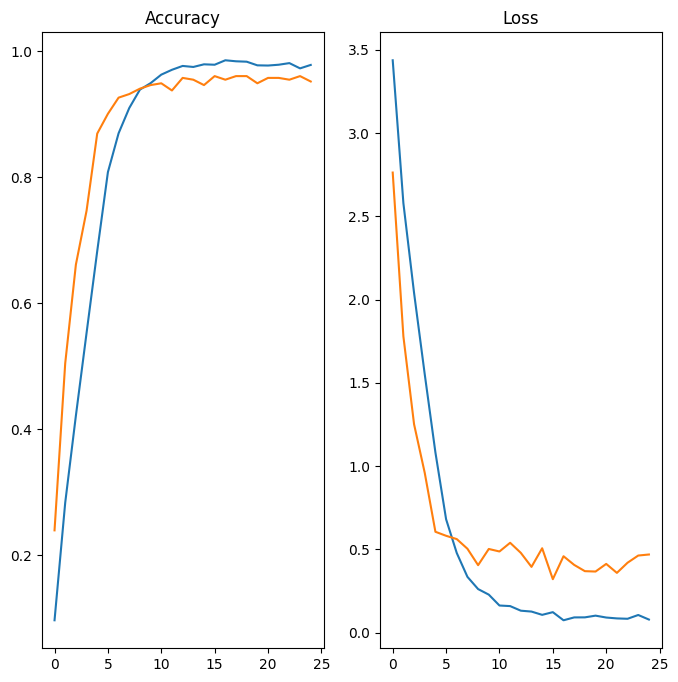

In [ ]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [ ]:
image = '/content/drive/MyDrive/Fruits_Vegetables/test/banana/Image_1.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [ ]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [ ]:
score = tf.nn.softmax(predict)

In [ ]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is banana with accuracy of 99.86


In [ ]:
model.save('Image_classify.keras')